In [1]:
# Importing libraries required for data cleaning and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [2]:
# Reading Data from the files

In [3]:
test = pd.read_csv("test.csv", index_col = 0)
train = pd.read_csv("train.csv", index_col = 0)
total = pd.merge(train,test)

In [4]:
# This is a sample output as required by the kaggle

In [5]:
gender = pd.read_csv("gender_submission.csv")
type(train)

pandas.core.frame.DataFrame

In [6]:
# Calculating average of the age from both train and test dataframesa, as some values of age are not given to us, we are going to replace NaN values with the averages. Taking average because age is continuous data

In [7]:
avg = train['Age'].mean()
avg2 = test['Age'].mean()

In [8]:
train['Age'] = train['Age'].fillna(avg)
test['Age'] = test['Age'].fillna(avg2)

In [9]:
# Replacing NaN in Cabin column with 0 for the time being

In [10]:
train['Cabin']=train['Cabin'].fillna(0)
test['Cabin']=test['Cabin'].fillna(0)
# train

In [11]:
# Replacing NaN in Embarked with the value which occurs maximum time(that is taking mode). Using mode because Embarked contains categorical values(S, C or Q).

In [12]:
train.Embarked.mode()
test.Embarked.mode()
train.Embarked = train['Embarked'].fillna('S')
test.Embarked = test['Embarked'].fillna('S')

In [13]:
# Checking if Embarked still contains null values

In [14]:
train.Embarked.isnull().sum()
test.Embarked.isnull().sum()

0

In [15]:
# In the next, I used re to find specific pattern in Name, and by pattern I mean finding the designations like "Mr., Mrs., Sir, Ms., Col., etc". I did the same for train and test both Datasets.

In [16]:
pattern = r'[A-Z]+\.'
regex = re.compile(pattern, flags = re.IGNORECASE)
for i in range(1,len(train.Name)+1):
    train.Name[i] = regex.findall(train.Name[i])[0]


In [17]:
for i in range(1,len(test.Name)+1):
    test.Name[i+891] = regex.findall(test.Name[i+891])[0]

In [18]:
# Here an assumption was made that by "Dona." the dataset meant "Don." as all other Designations were same in train and test.

In [19]:
test.Name = test.Name.replace(to_replace = "Dona.", value = "Don.")
test.Name.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Don.'], dtype=object)

In [20]:
# In order to use "Name" column in our Classification it needs to be converted to Integer, but now it is of string type. So for converting it to integers, I used One-Hot Encoding (dummy variables).

In [21]:
#  Most common problem that we can face while using One-Hot Encoding is some variables might be present in train dataset but not in test dataset or worse they might be mistyped in other dataset(the assumption of Dona. above). So either we should use both train and test dataset while computing dummy variables or should confirm that the number of variables are same in both datasets. I used the former method as number of variables are not same in the datasets.

In [22]:
name = np.concatenate([train.Name, test.Name],axis = 0)
name = pd.get_dummies(name)
#working

In [23]:
# Increasing the index by 1 to match the index of our original datasets.

In [24]:
trans = lambda x:x+1
name.index = name.index.map(trans)
# name

In [25]:
# Now joining the dummy variables using index to their own daasets.

In [26]:
name2 = name[0:891] #working

In [27]:
name3 = name[891:] #working

In [28]:
train = train.join(name2)
test = test.join(name3)

In [29]:
# train

In [30]:
# Dropping the "Name" column as we have joined the dummy variables so its of no use to us.

In [31]:
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)

In [32]:
# Gender is another column with string type, explicitly replacing male and female with 0 and 1 respectively

In [33]:
train = train.replace(to_replace=["male"],value=0)
test = test.replace(to_replace=["male"],value=0)

In [34]:
train = train.replace(to_replace=["female"],value=1)
test = test.replace(to_replace=["female"],value=1)

In [35]:
# What you will see below is a failed attempt to incorporate "Cabin" column using the same procedure.

In [36]:
# # train.Name = pd.get_dummies(train.Name.unique())
# fig,axes = plt.subplots(1,1)
# df = train[['Age','Survived']]
# df.plot.barh()
pattern2 = r'[A-Z]+[0-9]'
regex2 = re.compile(pattern2, flags = re.IGNORECASE)
for i in range(1,len(train.Cabin)+1):
    train.Cabin[i] = regex2.findall(train.Cabin[i])[0]
# train

TypeError: expected string or bytes-like object

In [37]:
# For "Embarked" column I again used One-Hot Encoding, by concatenating from both datasets, creating dummy variables, increasing the index by 1, joining them using index to their own datasets and then droppig "Embarked" column. Other way is to explicitly replace ['S', 'C', 'Q'] with integer values.

In [38]:
# train = train.drop(["Name","Ticket"], axis = 1)
# test
Embark = np.concatenate([train.Embarked, test.Embarked],axis = 0)


In [39]:
dum = pd.get_dummies(Embark)

In [40]:
dum.index = dum.index.map(trans)

In [41]:
Embark1 = dum[0:891]
Embark2 = dum[891:]

In [42]:
train = train.join(Embark1)
test = test.join(Embark2)

In [43]:
train.drop(['Embarked'],axis = 1, inplace=True)
test.drop(['Embarked'],axis = 1, inplace=True)

In [44]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.',
       'Ms.', 'Rev.', 'Sir.', 'C', 'Q', 'S'],
      dtype='object')

In [45]:
# Using scatter plot to see if other columns like 'SibSp', 'Parch' are useful or not

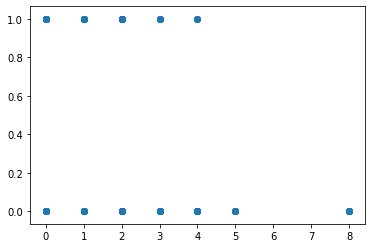

In [46]:
fig, ax = plt.subplots()
ax.scatter(train['SibSp'], train['Survived'])

In [47]:
# Dropping the columns which can not help in classification or are too random like "Tickets" column

In [48]:
train.drop(['Parch', 'SibSp','Ticket','Cabin'],axis = 1, inplace=True)
test.drop(['Parch', 'SibSp','Ticket','Cabin'],axis = 1, inplace=True)

In [49]:
# Taking "Survival" column from train dataset and dropping it from train

In [50]:
train.sample(frac = 1)
y_full = train.Survived
train_data = train[:600]
test_data = train[600:]

In [51]:
y = train_data.Survived
y_test = test_data.Survived
train = train.drop(["Survived"], axis = 1)
train_data = train_data.drop(["Survived"], axis = 1)
test_data = test_data.drop(["Survived"], axis = 1)

In [52]:
# Data Cleaning and transformation is Done.
# Proceeding to next step of Model fitting and Prediction

In [53]:
# First using Logistic Regression from scikit-learn

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
# Fitting Logistic Regression Model
# Using C = 10, we can reach a maximum score of 80.8 %

In [57]:
model = LogisticRegression(C = 10).fit(train_data,y)

In [58]:
# Checking the fit on the train data itself by using score method

In [59]:
Logisit_score = model.score(test_data,y_test)
Logisit_score

0.8041237113402062

In [60]:
# Now using XGBoost, most recent development in classifier algorithms
# Fitting the model and then assessing the fit on train dataset itself using "score()" method

In [62]:
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier

In [63]:
test_y = pd.read_csv("gender_submission.csv", index_col= 0)

In [64]:
model2 = XGBClassifier().fit(train_data,y)

In [65]:
XGB_score = model2.score(test_data,y_test)

In [66]:
XGB_score

0.8075601374570447

In [67]:
# Using Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree = DecisionTreeClassifier(random_state = 0, max_depth=5)
tree.fit(train_data,y)
tree_score = tree.score(test_data,y_test)
tree_score

0.8281786941580757

In [67]:
# displaying the decision tree created by the algorithms

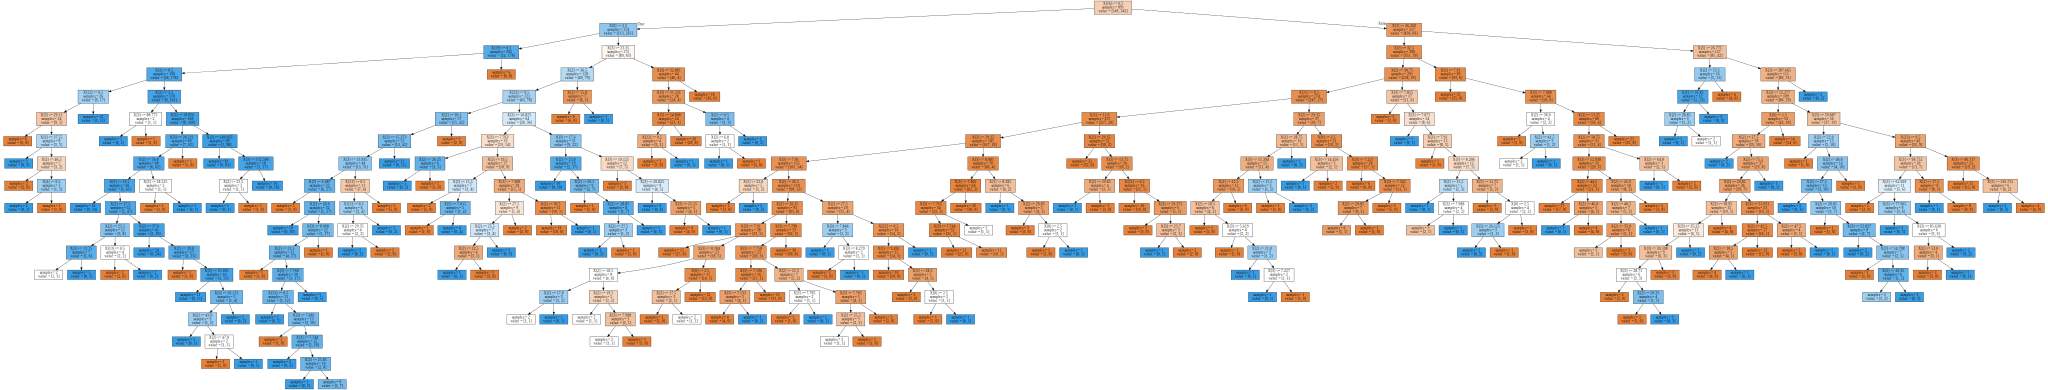

In [68]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file = "tree.dot",impurity =False, filled = True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [69]:
# Using Random Forest Classifier
# using n_estimators = 100 as score decreases on n_estimator = 10 and at 100 it is at its maximum

In [70]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=0).fit(train,y)
forest_score = forest.score(train,y)

In [71]:
# Using Gradient Boosted Trees
# learning rate is how much the new trees learns from the previous tree (as much as I understood)
# max_depth explains itself

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state = 2, max_depth=4, learning_rate= 0.1).fit(train,y)
GBC_score = GBC.score(train, y)

In [73]:
# Using Support Vector Classifier
# Using Gaussian Kernel "rbf" and tuning the parameters gamma and C so that model doesn't overfit

In [74]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
Lsvc = LinearSVC().fit(train, y)
svc = SVC(kernel = "rbf", C = 15, gamma = 0.3).fit(train, y)
svc_score = svc.score(train, y)

In [75]:
# Using Neural Networks
# nonlinear tanh and using two hidden layers

In [76]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 1000, solver = "lbfgs",activation="tanh", random_state=0, hidden_layer_sizes=[100,100], alpha = 0.3).fit(train, y)
mlp_score = mlp.score(train, y)

In [77]:
Models = pd.DataFrame({'Model':['Logistic Regression', 'XGBoost','Decision Tree', 'Random Forest Classifier', 'Gradient Boosting', 'Support Vector Classifier', 'Neural Network'], 'Score':[Logisit_score, XGB_score,tree_score, forest_score,GBC_score, svc_score,mlp_score]})

In [78]:
Models

,Model,Score
0,Logistic Regression,0.808081
1,XGBoost,0.962963
2,Decision Tree,0.982043
3,Random Forest Classifier,0.982043
4,Gradient Boosting,0.933782
5,Support Vector Classifier,0.961841
6,Neural Network,0.920314


In [79]:
test['Fare'] = test['Fare'].fillna(test.Fare.mean())

In [80]:
test.isna().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Capt.        0
Col.         0
Countess.    0
Don.         0
Dr.          0
Jonkheer.    0
Lady.        0
Major.       0
Master.      0
Miss.        0
Mlle.        0
Mme.         0
Mr.          0
Mrs.         0
Ms.          0
Rev.         0
Sir.         0
C            0
Q            0
S            0
dtype: int64

In [81]:
Y_pred = mlp.predict(test)

In [82]:
test_df = pd.read_csv('test.csv')

In [83]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)